In [1]:
#loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### To download the dataset <a href="https://drive.google.com/file/d/17lq-P_Ro9Cw4M7Le2OSF8C0PpxcCrw9S/view?usp=sharing" title="Google Drive">click here</a>

In [2]:
data = pd.read_csv('SVsalary2.csv')
data.head()

,EMP_ID,SALARY,DEPT,EXPERIENCE,SEX,PERFORMANCE,NUMBER_PROJECT,AVG_MONTHLY_HOURS,LEFT_JOB,PROMOTION_LAST_2_YRS
0,1,186960,sales and marketing,8,Female,Good,12,50,1,0
1,2,93000,Admin,5,Male,AVG,2,31,1,0
2,3,110515,Manufacturing,4,Male,Good,3,32,1,0
3,4,131205,Admin,9,Female,Good,12,21,1,0
4,5,104800,sales and marketing,10,Male,Bad,14,33,1,0


In [3]:
data.isnull().sum()

EMP_ID                  0
SALARY                  0
DEPT                    0
EXPERIENCE              0
SEX                     0
PERFORMANCE             0
NUMBER_PROJECT          0
AVG_MONTHLY_HOURS       0
LEFT_JOB                0
PROMOTION_LAST_2_YRS    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EMP_ID                50 non-null     int64 
 1   SALARY                50 non-null     int64 
 2   DEPT                  50 non-null     object
 3   EXPERIENCE            50 non-null     int64 
 4   SEX                   50 non-null     object
 5   PERFORMANCE           50 non-null     object
 6   NUMBER_PROJECT        50 non-null     int64 
 7   AVG_MONTHLY_HOURS     50 non-null     int64 
 8   LEFT_JOB              50 non-null     int64 
 9   PROMOTION_LAST_2_YRS  50 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 4.0+ KB


In [5]:
data.describe()

,EMP_ID,SALARY,EXPERIENCE,NUMBER_PROJECT,AVG_MONTHLY_HOURS,LEFT_JOB,PROMOTION_LAST_2_YRS
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,113109.940000,6.500000,8.260000,38.180000,0.600000,0.400000
std,14.57738,29065.266032,4.357728,5.058071,11.191633,0.494872,0.494872
min,1.00000,57800.000000,1.000000,2.000000,21.000000,0.000000,0.000000
25%,13.25000,91150.000000,3.250000,4.250000,30.000000,0.000000,0.000000
50%,25.50000,107154.000000,5.000000,7.000000,33.000000,1.000000,0.000000
75%,37.75000,133884.750000,9.000000,11.750000,50.000000,1.000000,1.000000
max,50.00000,186960.000000,24.000000,25.000000,59.000000,1.000000,1.000000


**Questions 1: Find out is there any impact of lefting a job becuase of getting or not getting promotions in a job from past 2 years, also find out is their any correlation between experience and number of projects**

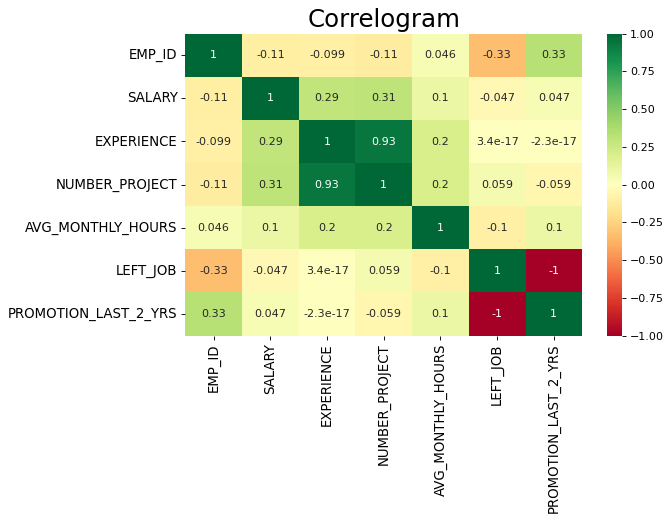

In [6]:
# Import Dataset
df = data

# Plot
plt.figure(figsize=(8,5), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Question 2:Show the mean of AVG_MONTHLY_HOURS,where the 50% of data relied? Find is their any outliers present?Do the same for NUMBER_PROJECT.**

<AxesSubplot:>

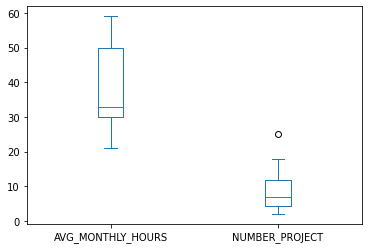

In [7]:
data[["AVG_MONTHLY_HOURS","NUMBER_PROJECT"]].plot.box()

**Question 3: Find out where experience data is more occupied and tell us insights about max salary takers belongs to which experience level**

<AxesSubplot:xlabel='EXPERIENCE', ylabel='SALARY'>

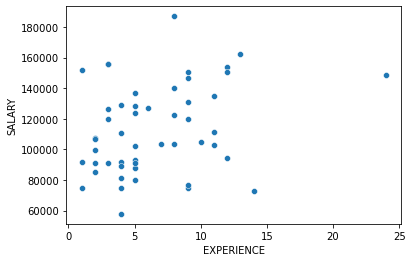

In [8]:
sns.scatterplot(x='EXPERIENCE', y='SALARY', data=data)

**Question 4: Compare performance in between male and female & Answer the following:**

**1. Highest avg performance rating is in which gender?**

**2. Lowest good performance in which gender?**

<AxesSubplot:xlabel='SEX', ylabel='count'>

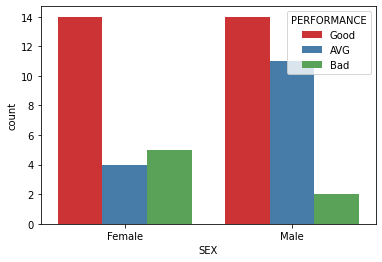

In [9]:
sns.countplot(x='SEX', hue = 'PERFORMANCE', data = df,
palette = 'Set1')

**Qestion 5: Having an Experience is a good thing, but in our dataset some of having really high number of years experience that usually impossible, find out by using any plot**

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EXPERIENCE'>

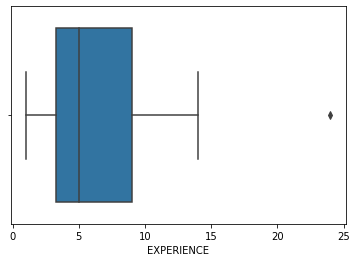

In [10]:
sns.boxplot( data['EXPERIENCE'] )

**Question 6 : Find out salary distribution by taking  performance into consideration, show which performance get max paid and which one geting lower paid as comapared to other**

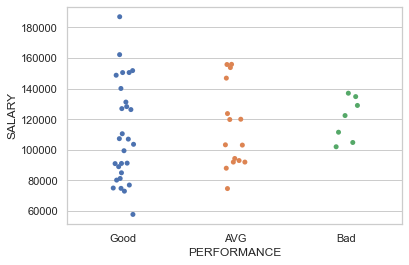

In [11]:
sns.set(style = 'whitegrid')  
tip = sns.load_dataset("tips")  
       
sns.stripplot(x="PERFORMANCE", y="SALARY", data=data)
  
plt.show()

**Question 7: Compare both male and female by appliying performance criteria on the department,**

**1. Find out which gender is performing good performance in manufacturing** 
    
**2. Find out which gender is performing bad performance in manufacturing**

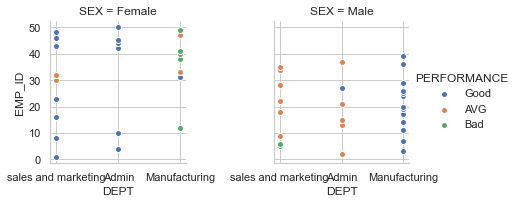

In [12]:
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(data, col ="SEX",  hue ="PERFORMANCE")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "DEPT", "EMP_ID", edgecolor ="w").add_legend()
# show the object
plt.show()

**Question 8: Which gender is making really good performance in sales and marketing dept and admin dept**

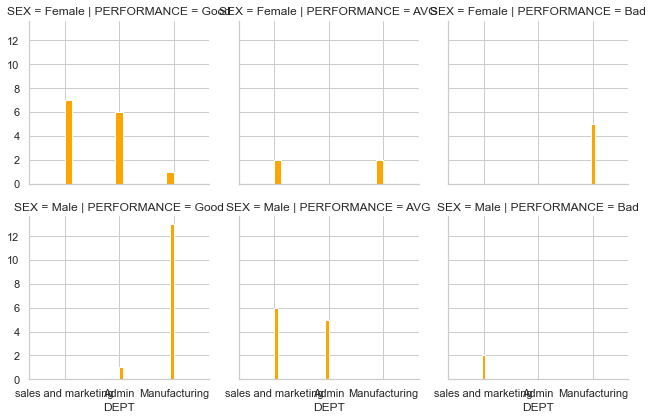

In [13]:
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(data, row ='SEX', col ='PERFORMANCE')
# map the above form facetgrid with some attributes
graph.map(plt.hist, 'DEPT', bins = 15, color ='orange')
# show the object
plt.show()

**Question 9: Plot a paiplot of salary dataset using with hue as a sex and give insights about plot**

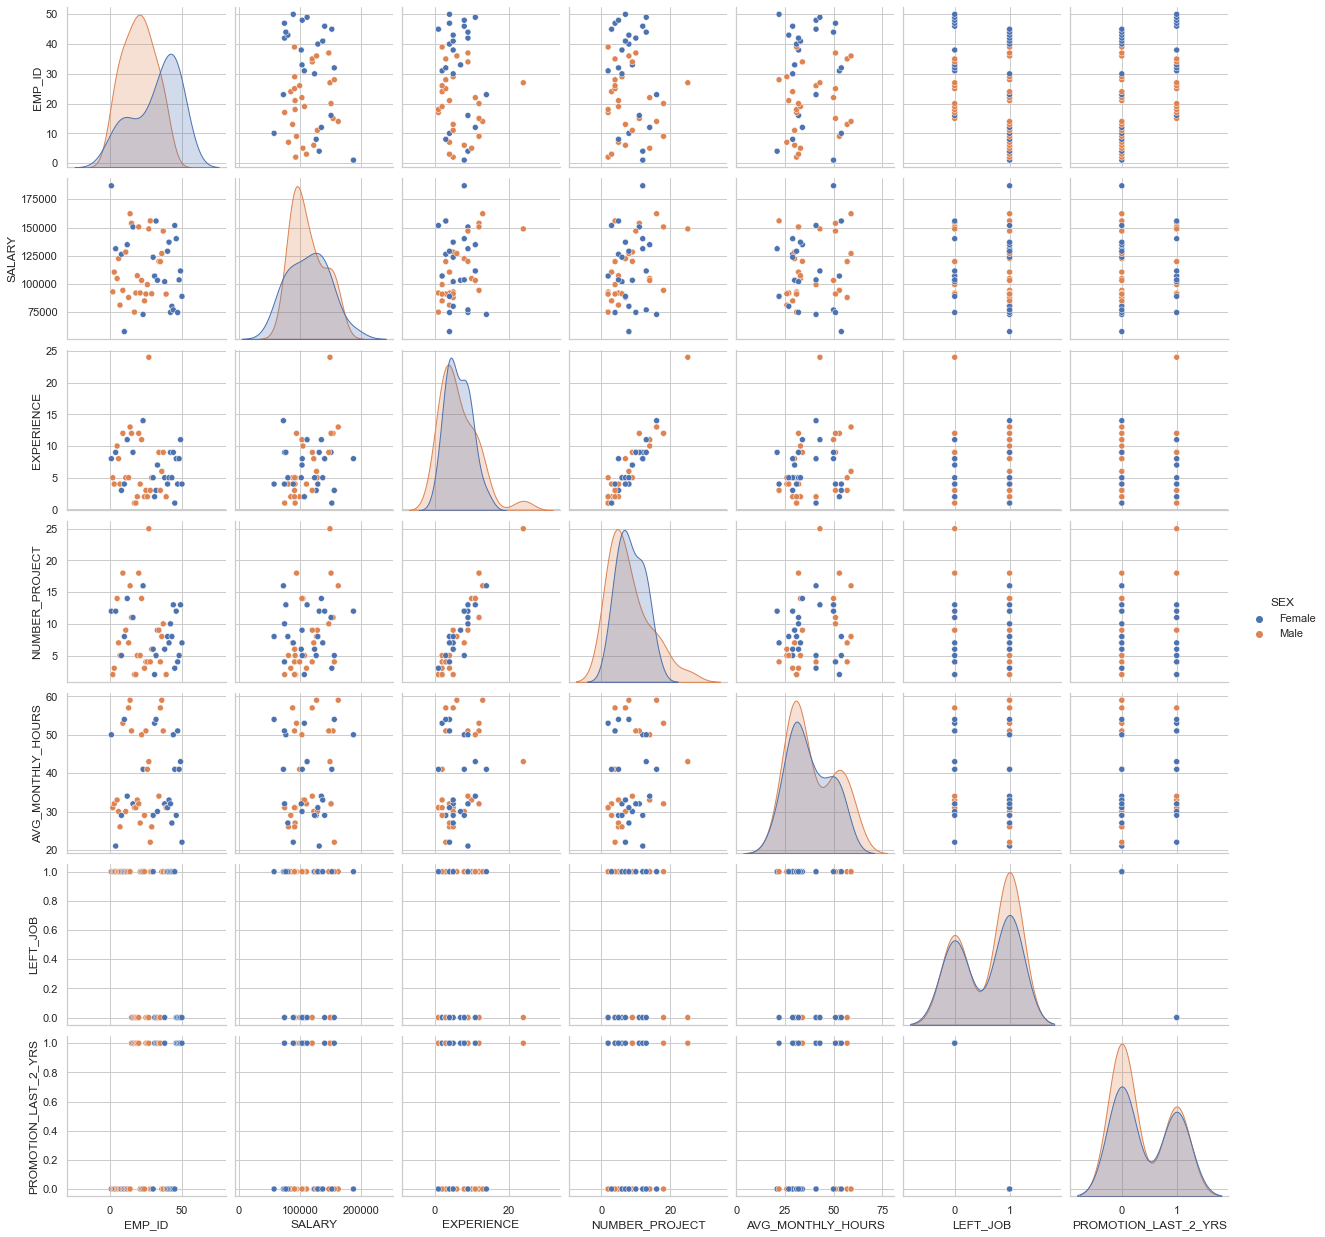

In [14]:
# loading dataset using seaborn
df = data
# pairplot with hue sex
sns.pairplot(df, hue ='SEX')
# to show
plt.show()

**Question 10: By using EXPERIENCE and NUMBER_PROJECT columns try to make**
**1. bar plot**
**2. line plot**
**3. violin plot**

<AxesSubplot:>

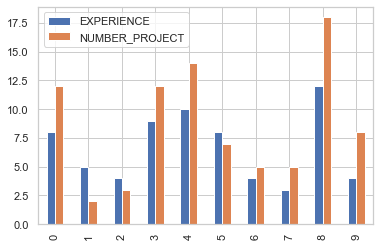

In [15]:
data[[ 'EXPERIENCE', 'NUMBER_PROJECT' ]].head(10).plot.bar()

<AxesSubplot:>

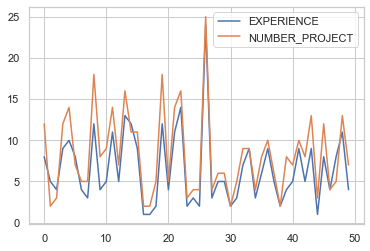

In [16]:
data[["EXPERIENCE","NUMBER_PROJECT"]].plot()

<AxesSubplot:xlabel='EXPERIENCE', ylabel='NUMBER_PROJECT'>

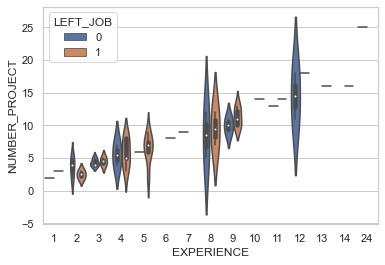

In [17]:
sns.violinplot(x="EXPERIENCE", y="NUMBER_PROJECT", hue="LEFT_JOB", data=data)